# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# # find the closest restaurant of each type to coordinates

# base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# params = {
#     "location": "39.952583,-75.16522",  # philadelphia coords
#     "rankby": "distance",
#     "type": "restaurant",
#     "key": gkey,
# }
# # use iterrows to iterate through pandas dataframe
# for index, row in types_df.iterrows():

#     # get restaurant type from df
#     restr_type = row['ethnicity']

#     # add keyword to params dict
#     params['keyword'] = restr_type

#     # assemble url and make API request
#     print(f"Retrieving Results for Index {index}: {restr_type}.")
#     response = requests.get(base_url, params=params).json()
    
#     # extract results
#     results = response['results']
    
#     try:
#         print(f"Closest {restr_type} restaurant is {results[0]['name']}.")
        
#         types_df.loc[index, 'name'] = results[0]['name']
#         types_df.loc[index, 'address'] = results[0]['vicinity']
#         types_df.loc[index, 'price_level'] = results[0]['price_level']
#         types_df.loc[index, 'rating'] = results[0]['rating']
        
#     except (KeyError, IndexError):
#         print("Missing field/result... skipping.")
        
#     print("------------")

In [9]:
citiesweather =[]
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&q="
limit = 1
for i in cities:
    query_url = f"{url}{i}&limit={limit}&appid={weather_api_key}"
    weather_response =requests.get(query_url)
    weather_json = weather_response.json()
    try: 
        weather_data ={
        "City": weather_json["name"],
        "Lat" : weather_json["coord"]["lat"],
        "Lng" : weather_json["coord"]["lon"],
        "Max Temp(f)": weather_json["main"]["temp_max"],
        "Humidity": weather_json["main"]["humidity"],
        "Cloudiness": weather_json["clouds"]["all"],
        "Wind Speed": weather_json["wind"]["speed"],
        "Country" : weather_json["sys"]["country"],
        "Date": weather_json["dt"]}
        citiesweather.append(weather_data) 
        print(-----------------------------------)
        print(f"Processing Record{}of Set{} | {City}"
    except:
        print("City not found. Skipping...")
# see gitlab starter code

City
City
City
City
City
City
City
City
Wasn't found
City
City
City
Wasn't found
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
Wasn't found
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
Wasn't found
City
City
City
City
Wasn't found
City
City
City
City
Wasn't found
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
Wasn't found
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
City
Wasn't found
City
City
City
City
City
City
City
City
City
City
City
City
City
City
Wasn't found
City
City
City
City
City
City
City
City
Wasn't found
City
City
Wasn't fou

In [10]:
weather_data =pd.DataFrame(citiesweather)
weather_data.count()

City           578
Lat            578
Lng            578
Max Temp(f)    578
Humidity       578
Cloudiness     578
Wind Speed     578
Country        578
Date           578
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame
weather_data.to_csv("output_data/cities.csv",encoding="utf-8", index=True, header=True)
weather_data.display()

In [11]:
# Export the city data into a .csv.
# Display the DataFrame 
weather_data.to_csv("output_data/cities.csv",encoding="utf-8", index=True, header=True) 
print(weather_data)

               City      Lat       Lng  Max Temp(f)  Humidity  Cloudiness  \
0        Butaritari   3.0707  172.7902        81.19        77          41   
1           Rikitea -23.1203 -134.9692        72.12        74         100   
2            Castro -24.7911  -50.0119        69.30        41           0   
3              Atar  20.5169  -13.0499        98.67        30           8   
4             Kapaa  22.0752 -159.3190        82.38        73          20   
..              ...      ...       ...          ...       ...         ...   
573        Takaungu  -3.6837   39.8566        75.69        85           0   
574           Aksay  47.2600   39.8700        84.25        33           5   
575        Ust-Maya  60.4167  134.5333        60.96        83          10   
576       Vancouver  49.2497 -123.1193        86.99        59           0   
577  Kulhudhuffushi   6.6221   73.0700        76.68        92         100   

     Wind Speed Country        Date  
0         15.23      KI  1659291959  

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
dryweather_data=weather_data[weather_data["Humidity"] <100]
dryweather_data.count()


City           572
Lat            572
Lng            572
Max Temp(f)    572
Humidity       572
Cloudiness     572
Wind Speed     572
Country        572
Date           572
dtype: int64

In [13]:
#  Get the indices of cities that have humidity over 100%.
moistweather_data=weather_data[weather_data["Humidity"]>100]
moistweather_data.head()


,City,Lat,Lng,Max Temp(f),Humidity,Cloudiness,Wind Speed,Country,Date


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=dryweather_data.rename(mapper=None, index=str, columns=None, axis=None, copy=True, inplace=False, level=None)
display(clean_city_data)


,City,Lat,Lng,Max Temp(f),Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,81.19,77,41,15.23,KI,1659291959
1,Rikitea,-23.1203,-134.9692,72.12,74,100,18.63,PF,1659291960
2,Castro,-24.7911,-50.0119,69.30,41,0,6.20,BR,1659291907
3,Atar,20.5169,-13.0499,98.67,30,8,13.15,MR,1659291961
4,Kapaa,22.0752,-159.3190,82.38,73,20,12.66,US,1659291961
...,...,...,...,...,...,...,...,...,...
573,Takaungu,-3.6837,39.8566,75.69,85,0,13.98,KE,1659292222
574,Aksay,47.2600,39.8700,84.25,33,5,14.00,RU,1659292222
575,Ust-Maya,60.4167,134.5333,60.96,83,10,3.67,RU,1659292222
576,Vancouver,49.2497,-123.1193,86.99,59,0,10.00,CA,1659291945


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [15]:
# MODEL CODE FROM ASK BCS
# plt.scatter(lats,
#            max_temps,
#            edgecolor="black", linewidths=1, marker="o",
#            alpha=0.8, label="Cities")
# # Incorporate the other graph properties
# plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
# plt.ylabel("Max Temperature (F)")
# plt.xlabel("Latitude")
# plt.grid(True)
# # Save the figure
# plt.savefig("output_data/Fig1.png")
# # Show plot
# plt.show()

# Also please try to have
# % matplotlib inline

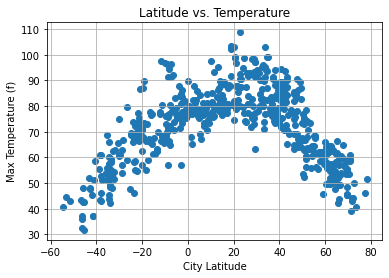

In [38]:
# # make the data
x = clean_city_data["Lat"]
y = clean_city_data["Max Temp(f)"]

# # size and color:
# sizes = np.random.uniform(15, 80, len(x))
# colors = np.random.uniform(15, 80, len(x))

# # plot
plt.scatter(x, y, vmin=0, vmax=100)
# plt.scatter(x,
#            y,
#            edgecolor="black",
#            linewidths=1,
#            marker="o",
#            alpha=0.8,
#            label="Cities")
# plt.rcParams["figure.figsize"] = (70,6)

# plt.scatter(x,
#             y, 
#             edgecolor="black",
#             s=sizes, 
#             c=colors, 
#            )

# Create a title, x label, and y label for our chart
# fig=plt.figure()
# fig.set_size_inches(5,5)
# plt.figure(figsize=(20,40)
plt.title("Latitude vs. Temperature")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (f)")
plt.grid(True)
# plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

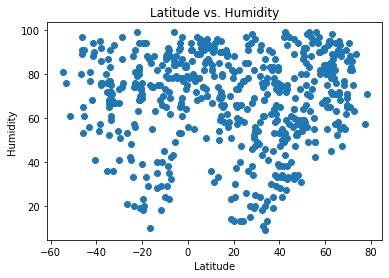

In [17]:


# # make the data
a = clean_city_data["Lat"]
b = clean_city_data["Humidity"]

# # size and color:
# sizes = np.random.uniform(15, 80, len(x))
# colors = np.random.uniform(15, 80, len(x))
# plt.rcParams["figure.figsize"] = (70,6)
# # plot

plt.scatter(a, b, vmin=0, vmax=100)

# set(xlim=(-60, 80), xticks=np.arange(10, 80),
#        ylim=(0, 100), yticks=np.arange(1, 100))
# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

## Latitude vs. Cloudiness Plot

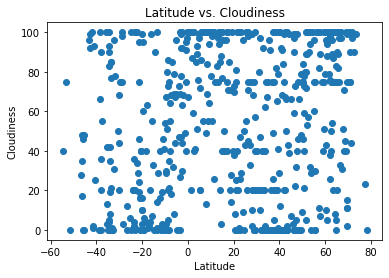

In [18]:

# # make the data
c = clean_city_data["Lat"]
d = clean_city_data["Cloudiness"]

# # size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# # plot
fig, ax = plt.subplots()

ax.scatter(c, d, vmin=0, vmax=100)

# ax.set(xlim=(-60, 80), xticks=np.arange(10, 80),
#        ylim=(0, 100), yticks=np.arange(1, 100))
# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

## Latitude vs. Wind Speed Plot

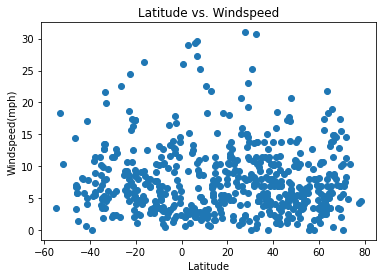

In [19]:
# # make the data
x = clean_city_data["Lat"]
y = clean_city_data["Wind Speed"]

# # size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# # plot
fig, ax = plt.subplots()

ax.scatter(x, y, vmin=0, vmax=100)

# ax.set(xlim=(-60, 80), xticks=np.arange(10, 80),
#        ylim=(0, 50), yticks=np.arange(5, 50))
# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed(mph)")

plt.show()

## Linear Regression


In [20]:
x=clean_city_data["Lat"]
# filter into =>1 and above = Northern Hemisphere
NHemi=clean_city_data.loc[clean_city_data["Lat"] >= 0]
#filter into =<1 and below = Southern Hemisphere
SHemi=clean_city_data.loc[clean_city_data["Lat"] <= 0]
# NHemi.count()
# 409
# SHemi.count()
# 184

In [21]:
x

0       3.0707
1     -23.1203
2     -24.7911
3      20.5169
4      22.0752
        ...   
573    -3.6837
574    47.2600
575    60.4167
576    49.2497
577     6.6221
Name: Lat, Length: 572, dtype: float64

In [22]:
y

0      15.23
1      18.63
2       6.20
3      13.15
4      12.66
       ...  
573    13.98
574    14.00
575     3.67
576    10.00
577    29.55
Name: Wind Speed, Length: 572, dtype: float64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.48370770864687984


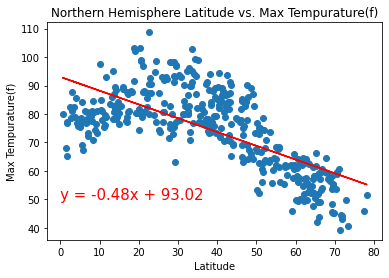

In [40]:
# # make the data
x = NHemi["Lat"]
y = NHemi["Max Temp(f)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, vmin=0, vmax=100)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere Latitude vs. Max Tempurature(f)")
plt.xlabel("Latitude")
plt.ylabel("Max Tempurature(f)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [41]:
# # Plot the different factors in a scatter plot
# x_values = clean_city_data["Lat"]
# y_values = clean_city_data["Max Tempurature(f)"]
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.xlabel('Normalized Blood Pressure')
# plt.ylabel('1Y_Disease_Progress')
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8088568204104107


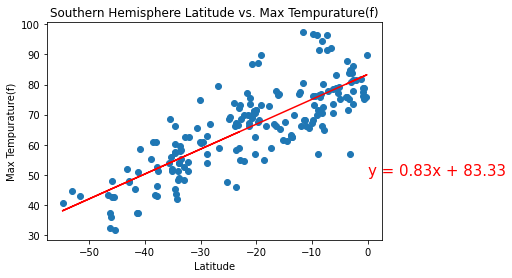

In [50]:
# # make the data
x = SHemi["Lat"]
y = SHemi["Max Temp(f)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, vmin=0, vmax=100)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# ax.set(xlim=(0, 80), xticks=np.arange(10, 80),
#        ylim=(0, 100), yticks=np.arange(1, 100))
# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere Latitude vs. Max Tempurature(f)")
plt.xlabel("Latitude")
plt.ylabel("Max Tempurature(f)")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04641744498798097


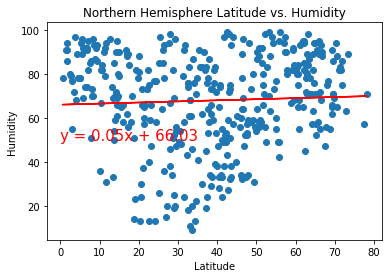

In [49]:
# # make the data
x = NHemi["Lat"]
y = NHemi["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, vmin=0, vmax=100)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# ax.set(xlim=(0, 80), xticks=np.arange(10, 80),
#        ylim=(0, 100), yticks=np.arange(1, 100))
# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.05494781977411213


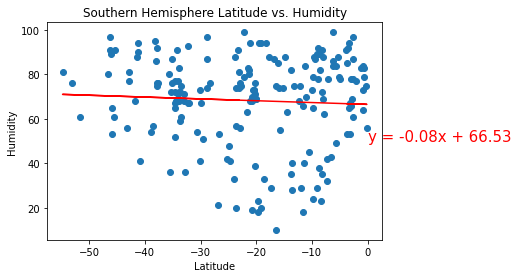

In [57]:
# # make the data
x = SHemi["Lat"]
y = SHemi["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, vmin=0, vmax=100)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# ax.set(xlim=(0, 80), xticks=np.arange(10, 80),
#        ylim=(0, 100), yticks=np.arange(1, 100))
# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.04002621224801207


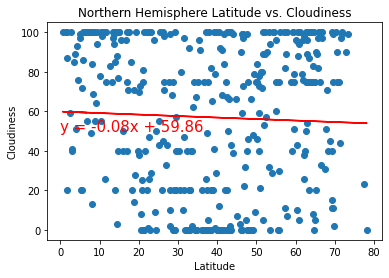

In [53]:
# # make the data
x = NHemi["Lat"]
y = NHemi["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, vmin=0, vmax=100)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09769211613775497


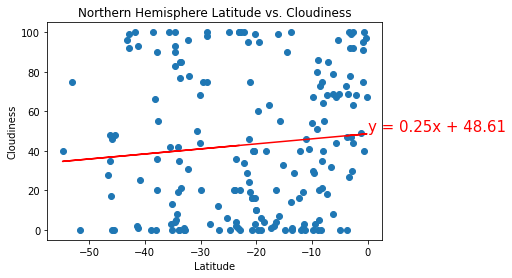

In [54]:
# # make the data
x = SHemi["Lat"]
y = SHemi["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, vmin=0, vmax=100)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.08463377689996189


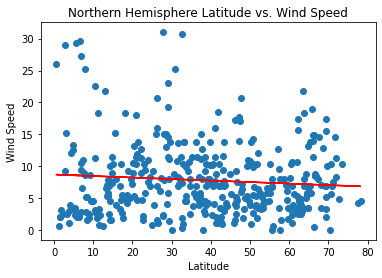

In [55]:
# # make the data
x = NHemi["Lat"]
y = NHemi["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, vmin=0, vmax=100)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.036748980246834144


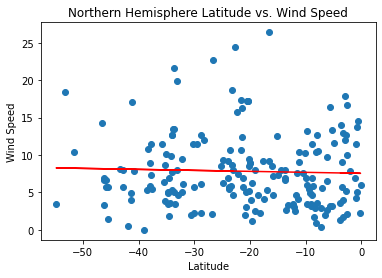

In [56]:
# # make the data
x = SHemi["Lat"]
y = SHemi["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y, vmin=0, vmax=100)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()